<a href="https://colab.research.google.com/github/sanjay7178/pytorch-dip/blob/main/Python_spatial_domain_filtering_of_image_and_Frequency_Domain_Filtering_of_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl "https://fastly.picsum.photos/id/866/450/300.jpg?hmac=LjxXLARrOTbivRrQD3Z2n3fNVwGNy21JDJduhoRLJ-s" --output 300.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11563  100 11563    0     0  89539      0 --:--:-- --:--:-- --:--:-- 89635


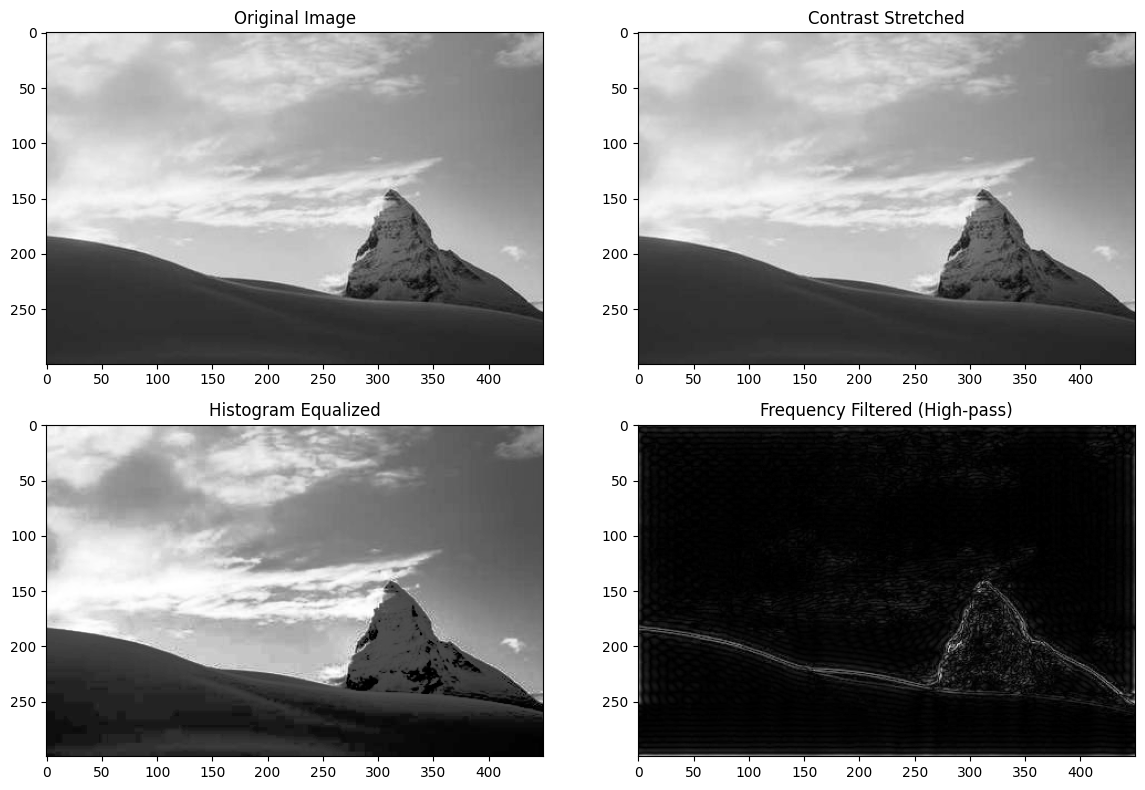

In [2]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/300.jpg', cv2.IMREAD_GRAYSCALE)

# --- Spatial Domain: Contrast Stretching ---
# 1. Find min and max pixel values
min_pixel = np.min(image)
max_pixel = np.max(image)

# 2. Stretch the contrast
contrast_stretched = (image - min_pixel) * (255 / (max_pixel - min_pixel))
contrast_stretched = contrast_stretched.astype(np.uint8)  # Convert back to uint8

# --- Spatial Domain: Histogram Equalization ---
histogram_equalized = cv2.equalizeHist(image)

# --- Frequency Domain Filtering ---
# 1. Perform Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# 2. Create a high-pass filter (e.g., Gaussian)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0  # Block low frequencies

# 3. Apply the filter in frequency domain
fshift_filtered = fshift * mask

# 4. Perform Inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift_filtered)
frequency_filtered = np.fft.ifft2(f_ishift)
frequency_filtered = np.abs(frequency_filtered)


# Display the results using Matplotlib
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched')

plt.subplot(2, 2, 3)
plt.imshow(histogram_equalized, cmap='gray')
plt.title('Histogram Equalized')

plt.subplot(2, 2, 4)
plt.imshow(frequency_filtered.astype(np.uint8), cmap='gray')
plt.title('Frequency Filtered (High-pass)')

plt.tight_layout()  # Adjust subplot spacing
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()